<a href="https://colab.research.google.com/github/Sufathasan/30-Day-Vanilla-JS-Coding-Challenge/blob/main/Personal_Expense_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
         Date       Category          Description  Amount
0  2025-01-01           Food  Lunch at restaurant    15.5
1  2025-01-02      Transport    Taxi fare to work     8.0
2  2025-01-02  Entertainment         Movie ticket    12.0
3  2025-01-03           Food     Grocery shopping    45.2
4  2025-01-03      Utilities     Electricity bill    60.0
Dataset loaded successfully!

Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Set and Check Budget
7. Exit
Expense updated successfully!

Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Set and Check Budget
7. Exit
Total spending by category:
Category
Entertainment    381.0
Food             515.0
Transport        348.0
Utilities        380.0
Name: Amount, dtype: float64
Highest spending category: Food
Lowest spending category: Transport
Daily totals:
Date
2025-01-01     15

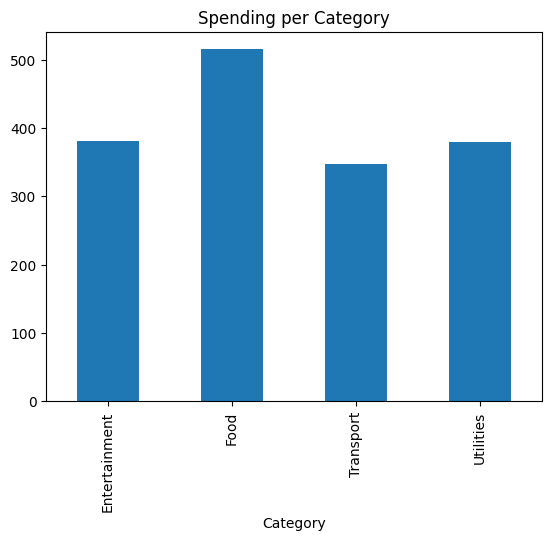

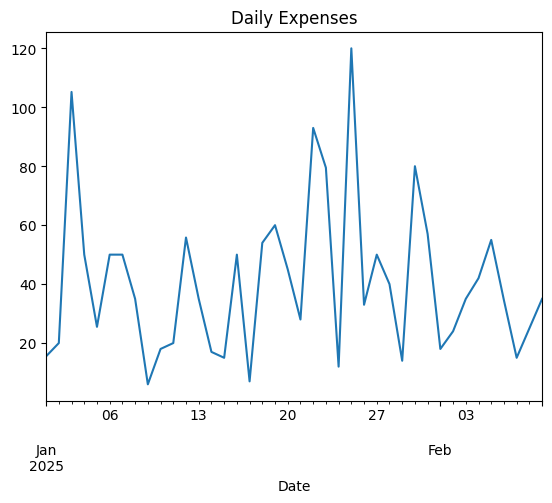

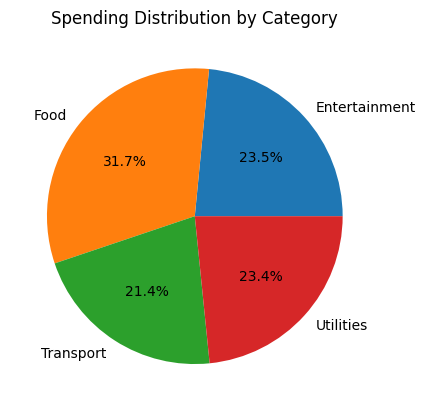


Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Set and Check Budget
7. Exit


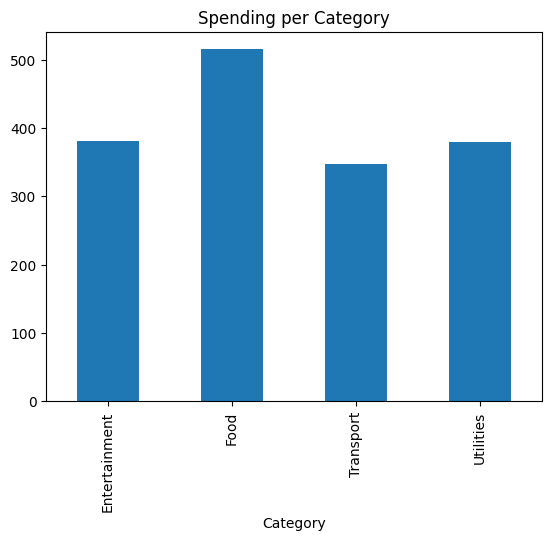

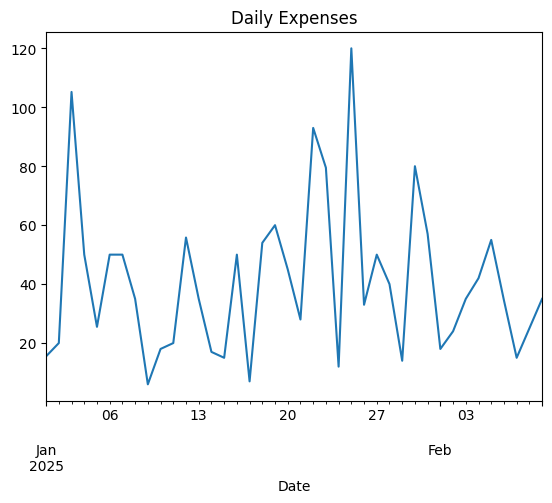

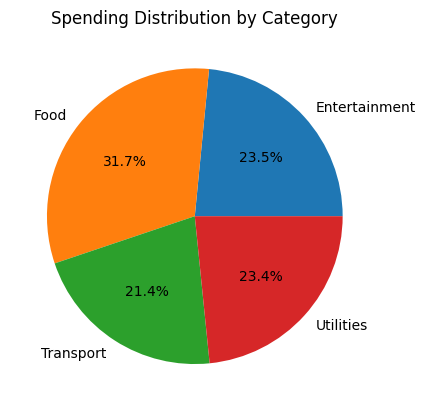


Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Set and Check Budget
7. Exit
Personal Expense Tracker
1. Add Expense
2. Update Expense
3. Delete Expense
4. Analyze Expenses
5. Visualize Expenses
6. Set and Check Budget
7. Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the dataset from a CSV file
def load_data(filepath):
    try:
        data = pd.read_csv(filepath)
        print("Dataset loaded successfully!")
        return data
    except FileNotFoundError:
        print("File not found. Creating a new dataset.")
        return pd.DataFrame(columns=['Date', 'Category', 'Description', 'Amount'])

# File path
filepath = '/content/4_Personal_Expense_Tracker.csv'

# Call the function
data = load_data(filepath)

# Print the first few rows of the dataset to confirm loading
print(data.head())

# Save the dataset back to the CSV file
def save_data(data, filepath):
    data.to_csv(filepath, index=False)
    print("Data saved successfully!")

# Add a new expense
def add_expense(data, date, category, description, amount):
    new_expense = {'Date': date, 'Category': category, 'Description': description, 'Amount': amount}
    data = data.append(new_expense, ignore_index=True)
    print("Expense added successfully!")
    return data

# Update an existing expense
def update_expense(data, date, category, new_description, new_amount):
    mask = (data['Date'] == date) & (data['Category'] == category)
    if mask.any():
        data.loc[mask, 'Description'] = new_description
        data.loc[mask, 'Amount'] = new_amount
        print("Expense updated successfully!")
    else:
        print("Expense not found.")
    return data

# Delete an expense
def delete_expense(data, date=None, category=None):
    if date:
        data = data[data['Date'] != date]
    if category:
        data = data[data['Category'] != category]
    print("Expense deleted successfully!")
    return data

# Validate category input
def validate_category(category):
    categories = ['Food', 'Transport', 'Entertainment', 'Utilities', 'Others']
    if category not in categories:
        print(f"Invalid category. Please choose from: {categories}")
        return False
    return True

# Analyze expenses
def analyze_expenses(data):
    if data.empty:
        print("No expenses to analyze.")
        return

    total_by_category = data.groupby('Category')['Amount'].sum()
    highest_category = total_by_category.idxmax()
    lowest_category = total_by_category.idxmin()
    daily_totals = data.groupby('Date')['Amount'].sum()

    print("Total spending by category:")
    print(total_by_category)
    print(f"Highest spending category: {highest_category}")
    print(f"Lowest spending category: {lowest_category}")
    print("Daily totals:")
    print(daily_totals)

# Visualize expenses
def visualize_expenses(data):
    if data.empty:
        print("No expenses to visualize.")
        return

    total_by_category = data.groupby('Category')['Amount'].sum()
    daily_totals = data.groupby('Date')['Amount'].sum()

    # Bar chart for spending per category
    total_by_category.plot(kind='bar', title='Spending per Category')
    plt.show()

    # Line chart for daily expenses
    daily_totals.plot(kind='line', title='Daily Expenses')
    plt.show()

    # Pie chart for percentage distribution by category
    total_by_category.plot(kind='pie', autopct='%1.1f%%', title='Spending Distribution by Category')
    plt.ylabel('')
    plt.show()

# Check monthly budget
def check_budget(data, budget):
    if data.empty:
        print("No expenses to check against the budget.")
        return

    data['Date'] = pd.to_datetime(data['Date'])
    monthly_total = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum()

    for month, total in monthly_total.items():
        print(f"Month: {month}, Spending: {total}")
        if total > budget:
            print(f"Over budget for {month}! Total spending: {total} exceeds budget: {budget}")

# Validate date input using regex
def validate_date(date):
    if not re.match(r'\d{4}-\d{2}-\d{2}', date):
        print("Invalid date format. Please use YYYY-MM-DD.")
        return False
    return True

# Menu for user interaction
def menu():
    filepath = input("Enter the file path of the CSV (default is 'expenses.csv'): ") or 'expenses.csv'
    data = load_data(filepath)

    while True:
        print("\nPersonal Expense Tracker")
        print("1. Add Expense")
        print("2. Update Expense")
        print("3. Delete Expense")
        print("4. Analyze Expenses")
        print("5. Visualize Expenses")
        print("6. Set and Check Budget")
        print("7. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            date = input("Enter date (YYYY-MM-DD): ")
            if not validate_date(date):
                continue
            category = input("Enter category: ")
            if not validate_category(category):
                continue
            description = input("Enter description: ")
            amount = float(input("Enter amount: "))
            data = add_expense(data, date, category, description, amount)

        elif choice == '2':
            date = input("Enter date of expense to update (YYYY-MM-DD): ")
            category = input("Enter category of expense to update: ")
            new_description = input("Enter new description: ")
            new_amount = float(input("Enter new amount: "))
            data = update_expense(data, date, category, new_description, new_amount)

        elif choice == '3':
            date = input("Enter date of expense to delete (leave blank to skip): ")
            category = input("Enter category of expense to delete (leave blank to skip): ")
            data = delete_expense(data, date, category)

        elif choice == '4':
            analyze_expenses(data)

        elif choice == '5':
            visualize_expenses(data)

        elif choice == '6':
            budget = float(input("Enter your monthly budget: "))
            check_budget(data, budget)

        elif choice == '7':
            save_data(data, filepath)
            print("Exiting. Data saved.")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the program
if __name__ == "__main__":
    menu()
